<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


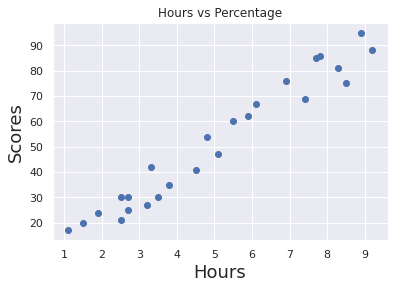

Model Training Completed


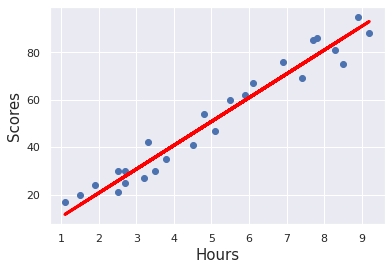

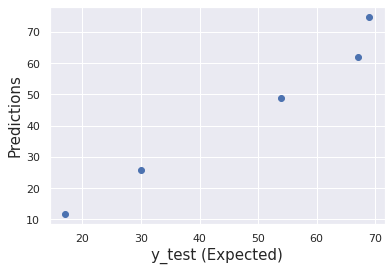

No of Hours = [[9.25]]
Predicted Score = [93.49349906]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression


url = 'http://bit.ly/w-data'
st_data = pd.read_csv(url)
st_data.head()
st_data.info()
st_data.describe(include='all')

x= st_data['Hours']
y= st_data['Scores']

plt.scatter(x, y)
plt.title('Hours vs Percentage')
plt.xlabel('Hours', fontsize=18)
plt.ylabel('Scores', fontsize=18)
plt.show()

X = x.values.reshape(-1,1)
Y = y.values.reshape(-1,1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=69)

st_reg = LinearRegression()
st_reg.fit(x_train, y_train)
print('Model Training Completed')

y_hat = st_reg.coef_*X + st_reg.intercept_

plt.scatter(X,Y)
plt.plot(X,y_hat, c='red', lw=3)
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Scores', fontsize=15)
plt.show()

y_predict = st_reg.predict(x_test)

df = pd.DataFrame(y_test, columns = ['Actual Score'])
df

df['Predicted score'] = y_predict
df

plt.scatter(y_test,y_predict)
plt.xlabel('y_test (Expected)', size=15)
plt.ylabel('Predictions', size=15)
plt.show()

hours = [[9.25, ]]
own_pred = st_reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))
from sklearn.metrics import mean_squared_error
